# US Real GDP and its Composition by Industry

In [1]:
# Uncomment if running in Google Colaboratory, otherwise the import of the curves module in the cell below will fail
#!git clone -l -s https://github.com/ilchen/US_Economic_Data_Analysis.git cloned-repo
#%cd cloned-repo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import pandas_datareader.data as web
from pandas.tseries.offsets import BDay
from dateutil.relativedelta import relativedelta
from datetime import date

In [3]:
report_start = date.fromisoformat('1969-01-01')
report_end = date.today()

In [4]:
real_gdp = web.get_data_fred('GDPC1', start=report_start, end=report_end)

# Convert to annual percentage changes
real_gdp = real_gdp.pct_change(4, fill_method='bfill')

# Rename and add a moving average
real_gdp.rename(columns={'GDPC1': 'Real GDP'}, inplace=True)
real_gdp['Real GDP Moving Avg (4Q)'] = real_gdp.iloc[:,0].rolling(4).mean()

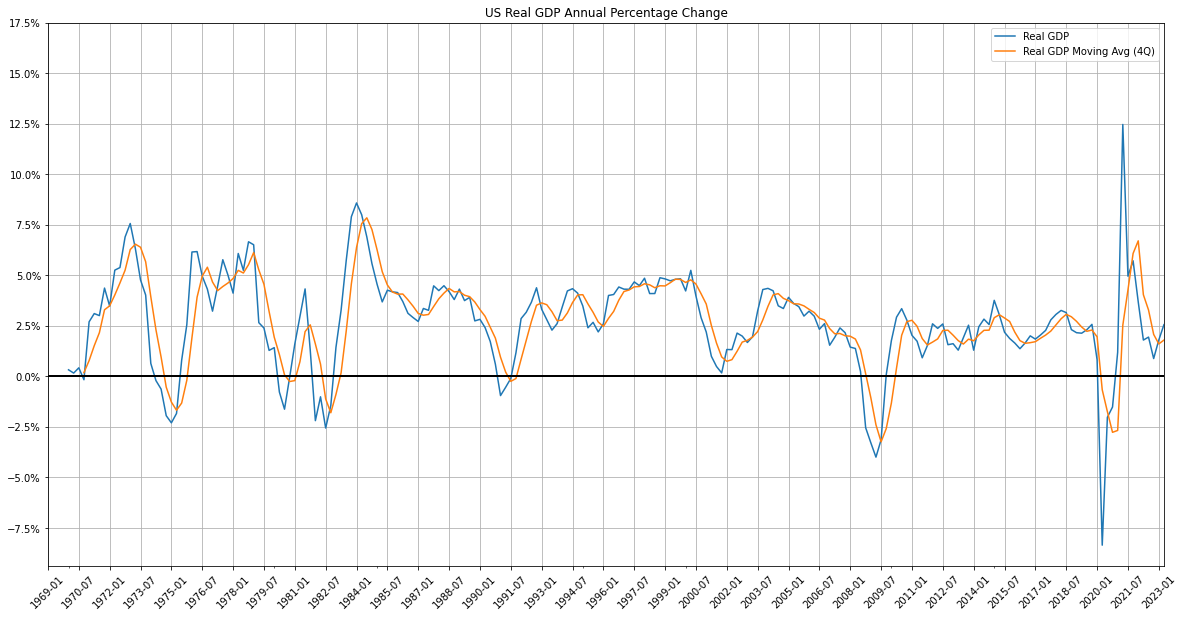

In [5]:
ax = real_gdp.plot(figsize=(20,10), grid=True, title='US Real GDP Annual Percentage Change',
                   xticks=real_gdp.index[::6], xlabel='', rot=45, yticks=np.arange(-.075, .2, 0.025))
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, real_gdp.index[::6])))

## Composition of US GDP
In this section of the notebook I look at the real value added (represents the sum of the costs-incurred and the incomes-earned in production, and consists of compensation of employees, taxes on production and imports, less subsidies, and gross operating surplus) for each constituent industry of US GDP and how it changed over the past 5 and 10 years.

Real value added measurements are in Billions of Chained 2012 Dollars

In [6]:
gdp_components = web.get_data_fred(['RVAAFH', 'RVAM', 'RVAU', 'RVAC', 'RVAMA', 'RVAW', 'RVAR', 'RVAT',
                                    'RVAI', 'RVAFI', 'RVARL', 'RVAPBS', 'RVAES', 'RVAHCSA', 'RVAAERAF',
                                    'RVAOSEG', 'RVAG', 'RVAAI'], start=report_start, end=report_end)

In [8]:
GDP_AFH_COLUMN_NAME = 'Agriculture, Forestry, Fishing, and Hunting'
GDP_M_COLUMN_NAME = 'Mining'
GDP_U_COLUMN_NAME = 'Utilities'
GDP_C_COLUMN_NAME = 'Construction'
GDP_MA_COLUMN_NAME = 'Manufacturing'
GDP_W_COLUMN_NAME = 'Wholesale Trade'
GDP_R_COLUMN_NAME = 'Retail Trade'
GDP_T_COLUMN_NAME = 'Transportation and Warehousing'
GDP_I_COLUMN_NAME = 'Information'
GDP_FI_COLUMN_NAME = 'Finance and Insurance'
GDP_RL_COLUMN_NAME = 'Real Estate, Rental, and Leasing'
GDP_PBS_COLUMN_NAME = 'Professional and Business Services'
GDP_ES_COLUMN_NAME = 'Educational Services'
GDP_HCSA_COLUMN_NAME = 'Health Care and Social Assistance'
GDP_AERAF_COLUMN_NAME = 'Arts, Entert., Recreat., Accom., and Food Services'
GDP_OSEG_COLUMN_NAME = 'Other Services'
GDP_G_COLUMN_NAME = 'Government'
GRAPH_TITLE_GDP_COMPONENTS = 'Composition of US GDP By Value Added'
GRAPH_TITLE_GDP_COMPONENTS_PCT_CHG = 'Percentage Change in Value Added by Each Component of US GDP'
gdp_components.rename(
    columns={'RVAAFH': GDP_AFH_COLUMN_NAME, 'RVAM': GDP_M_COLUMN_NAME,
             'RVAU': GDP_U_COLUMN_NAME, 'RVAC': GDP_C_COLUMN_NAME,
             'RVAMA': GDP_MA_COLUMN_NAME, 'RVAW': GDP_W_COLUMN_NAME,
             'RVAR': GDP_R_COLUMN_NAME, 'RVAT': GDP_T_COLUMN_NAME,
             'RVAI': GDP_I_COLUMN_NAME, 'RVAFI': GDP_FI_COLUMN_NAME,
             'RVARL': GDP_RL_COLUMN_NAME, 'RVAPBS': GDP_PBS_COLUMN_NAME,
             'RVAES': GDP_ES_COLUMN_NAME, 'RVAHCSA': GDP_HCSA_COLUMN_NAME,
             'RVAAERAF': GDP_AERAF_COLUMN_NAME,
             'RVAOSEG': GDP_OSEG_COLUMN_NAME, 'RVAG': GDP_G_COLUMN_NAME},
    inplace=True)

gdp_total = gdp_components.iloc[:,-1]
gdp_components = gdp_components.iloc[:,:-1]

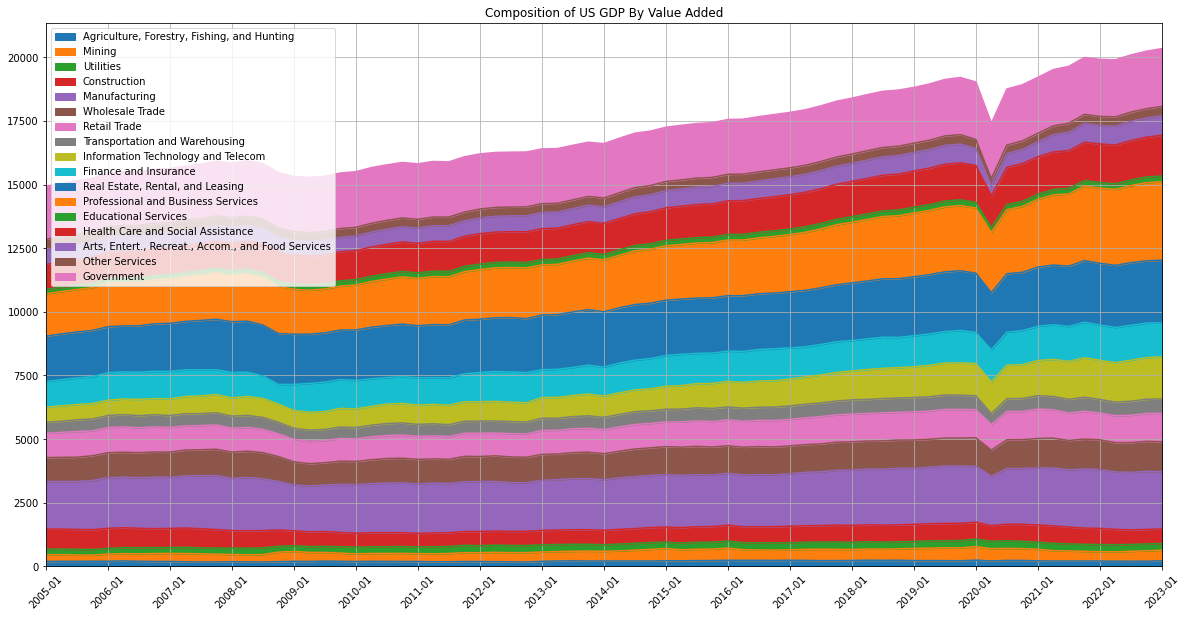

In [9]:
ax = gdp_components.plot.area(figsize=(20,10), grid=True, title=GRAPH_TITLE_GDP_COMPONENTS,
                              xticks=gdp_components.index[::4], xlabel='', rot=45)
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, gdp_components.index[::4])))

In [10]:
# Converting to percentages by dividing by total
gdp_components_pct = gdp_components.divide(gdp_components.sum(axis=1), axis=0)

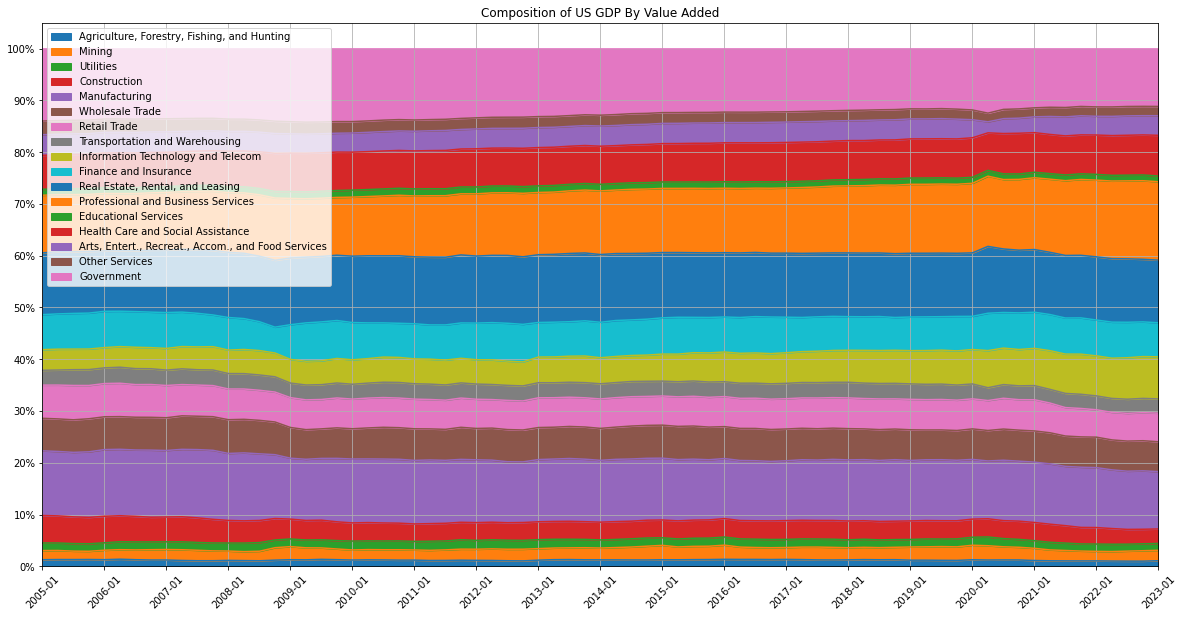

In [22]:
ax = gdp_components_pct.plot.area(figsize=(20,10), grid=True, title=GRAPH_TITLE_GDP_COMPONENTS,
                              xticks=gdp_components_pct.index[::4], xlabel='', rot=45,
                              yticks=np.arange(0, 1.01, .1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.legend(loc='upper left')
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, gdp_components_pct.index[::4])))

**Conclusion 1**: Professional and Business services, Government, Manufecturing, and Real Estate Rental and Leasing industries contribute the most value added to US GDP.

### Percentage Changes in Value Added by Each Industry of US GDP
It's interesting to analyze how much each industry contributed to the overall Real GDP growth over a number of years. This lets us see which industry are growing the most.

The way I break down overall Real GDP percentage change over a period into those of indivudual industries so that they all sum up to the same number is by using the following formula. If X = Y + Z, then:

 percentage change of $X = {X_2 - X_1 \over X_1} = {Y_2 + Z_2 - Y_1 - Z_1 \over Y_1 + Z_1} = {Y_2 - Y_1  \over Y_1 + Z_1} + {Z_2 - Z_1 \over Y_1 + Z_1}$

I will limit analysis to changes over 5 and 10 years. If you want to analyze different intervals, just edit the 'periods' variable in the below cell.

In [12]:
periods = [10, 5]

First let's see by how much the total Real GDP has changed over the specified periods in percentage points.

In [13]:
gdp_total_pct_chg = pd.DataFrame([gdp_total.pct_change(4*period).iloc[-1] for period in periods], 
                                 index=['Over past {:d} years'.format(period) for period in periods],
                                 columns=['Percentage Change'])
gdp_total_pct_chg

,Percentage Change
Over past 10 years,0.233634
Over past 5 years,0.100108


Now I break down these overall Real GDP percentacge changes into percentage changes in individual industries so that they sum up to the same real GDP percentage change number.

In [14]:
gdp_components_pct_chg = pd.concat(
    [((gdp_components - gdp_components.shift(4*period)).divide(gdp_total.shift(4*period), axis=0)).iloc[-1] for period in periods],
                                    axis=1)
gdp_components_pct_chg.columns = ['Over past {:d} years'.format(period) for period in periods]

In [15]:
gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[0], inplace=True)

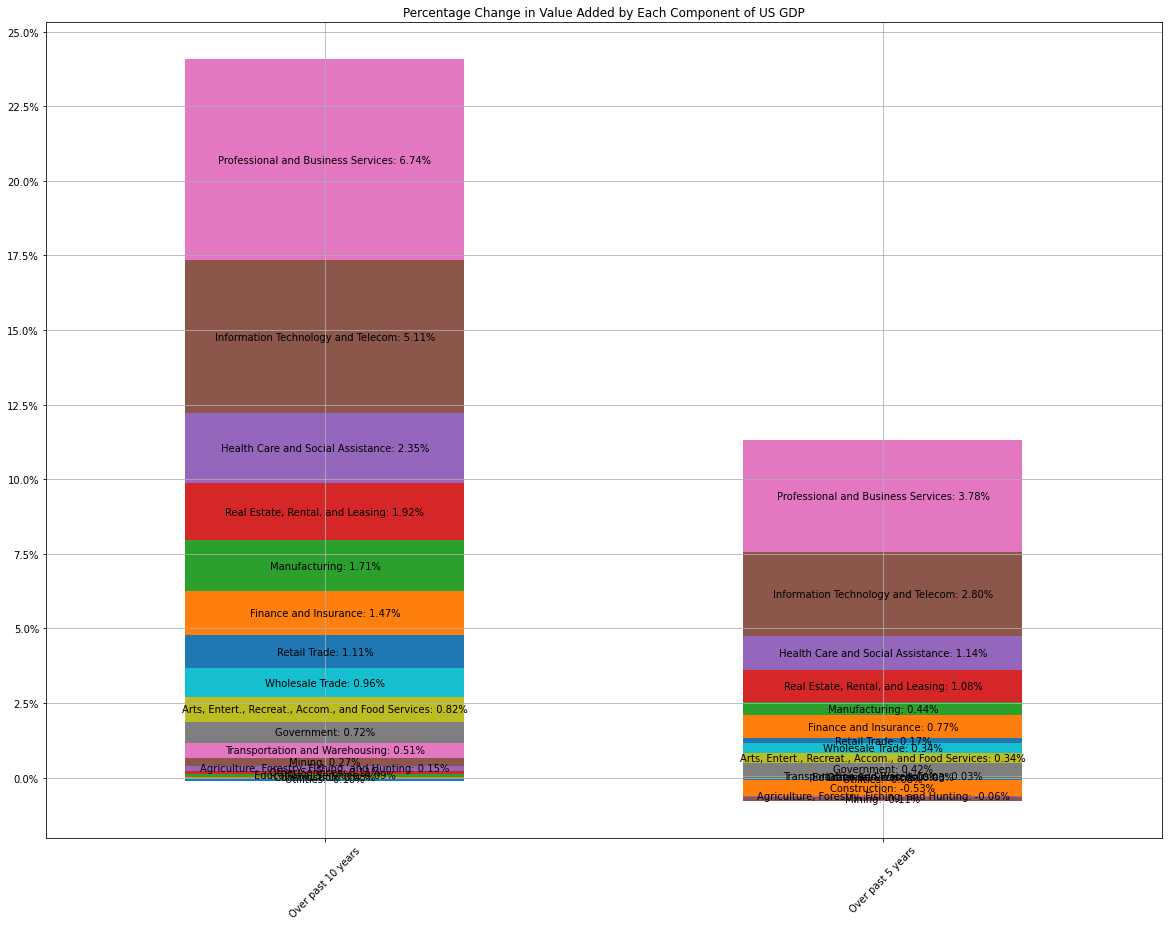

In [18]:
ax = gdp_components_pct_chg.T.plot.bar(figsize=(20,15), grid=True, title=GRAPH_TITLE_GDP_COMPONENTS_PCT_CHG,
                                       stacked=True, rot=45, yticks=np.arange(0, 0.26, .025))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.get_legend().remove()
for c in ax.containers:
    ax.bar_label(c, fmt=c.get_label() + ': {:.2%}', label_type='center')

**Conclusion 2**: The largest growing industries, as measured by their real value added contributon to the overall GDP growth, are:
* Professional and Business Services
* Information
* Health Care and Social Assistance
* Real Estate, Rental, and Leasing
* Manufecturing
* Finance and Insurance

Of these industries:
* Professional and Business Services
* Real Estate, Rental, and Leasing
* Manufecturing
are also in the Top-5 biggest contributoes to the US GDP (see Conclusion 1 above).